# 1. Handling images

Images in the Python world in general are simply multi-dimensional arrays (or matrices or tensors) of numbers. For example a regular image taken with a phone is composed of three 2D arrays of numbers (planes), one for each of Red, Green and Blue channels (RGB image).

In order to create images, modify them, use algorithms to create images etc. we need to understand how to handle images as objects in the Python world.

## Images as arrays

As mentioned above, images are simply matrices of numbers. Simple Python lists are not very efficient to handle such large lists, so we use another type of object called an array via the Python package called Numpy. Let's remember that we first need to import the package:

In [1]:
import numpy as np

Now that it's imported we can use functions by using the notation ```np.function``` or sometimes ```np.submodule.function``` for functions grouped in a certain category. For example we can generate a 2D list of random numbers using:

In [2]:
import numpy as np

im_noise = np.random.randint(low=0, high=255, size=(10,10))
im_noise

array([[244, 200, 246, 232, 228, 160, 226,  86,  13,  93],
       [ 26, 114, 141, 221, 148,  63, 234, 175,  56, 159],
       [214, 207, 120,  62, 159,   2,  51, 127,  35,  70],
       [125, 122, 152, 171, 131,  95,  92, 152, 121, 232],
       [114, 142, 124, 208,   3, 103,  76, 100,  83, 126],
       [ 71, 139, 136, 184, 195,  16, 226, 108, 107, 103],
       [ 31, 122, 235, 138, 234, 150,  85,  27, 126, 147],
       [ 67,  74,  45, 229, 145, 224, 118, 108, 156,  63],
       [175, 121,  35,  54,  36,  99, 186, 218, 113,  41],
       [224,  95, 132,  87, 135,  80,  44, 240, 137, 104]])

We called this function with three **arguments**: ```low``` and ```high``` specify the limits of the values elements can take, size specifies the number of rows and columns that we want. In our context the latter specifies the number of pixels of the image. So the output you see above is an actual image!

Usually images are not represented as numbers, so we attribute a colour to each value. Most commonly we use scale saying dark means low value and bright means high value. To do this representation we use here a module from another package called matplotlib that we import in the following way:

In [3]:
import matplotlib.pyplot as plt

From this module we'll almost exclusively use the ```imshow``` function used to represent images:

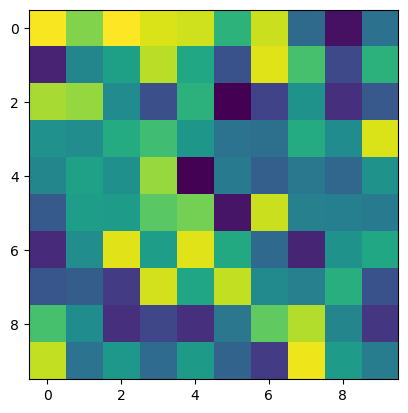

In [4]:
plt.imshow(im_noise)

We see that by default that package uses an unusual colouring scheme called viridis.

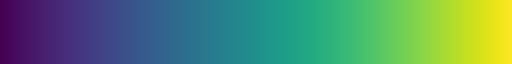

In [5]:
plt.cm.viridis  # Change 'viridis' to any other colormap

We can however change this representation and pick another colormap:

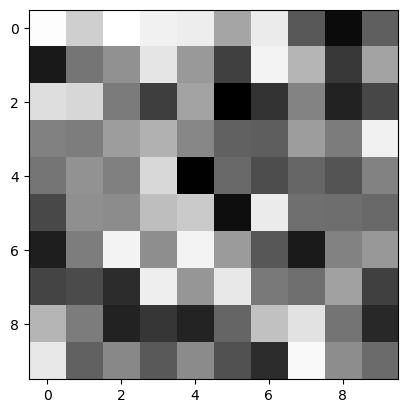

In [6]:
plt.imshow(im_noise, cmap='gray');

Images have an important property which is their **type**, i.e. how the pixel values are encoded. Most of the time, natural images are encoded as 8bit, which means pixels can take values between 0 and 255. Our current random image is of type:

In [7]:
im_noise.dtype

dtype('int64')

which means that values have to be integer. When we start manipulating images, it's often favorable to not be constrained by this and to avoid any issues we often modify the image type using the ```astype``` method:

In [8]:
im_noise_float = im_noise.astype(float)

## Accessing pixel values

Sometimes, we only want to work with part of an image. We know the location of each pixel within our 10x10 grid so we can use that information to "extract" the value(s) from the array. For example if we want the top left pixel at row=0 and column=0 we use these coordinates within square parentheses or brackets:

In [9]:
im_noise[0,0]

np.int64(244)

Very often we don't need to access a single pixel, but an entire region. In other terms we want to crop the image. Let's say we want to focus our attention on a region in the middle of the image. 

In [10]:
im_noise

array([[244, 200, 246, 232, 228, 160, 226,  86,  13,  93],
       [ 26, 114, 141, 221, 148,  63, 234, 175,  56, 159],
       [214, 207, 120,  62, 159,   2,  51, 127,  35,  70],
       [125, 122, 152, 171, 131,  95,  92, 152, 121, 232],
       [114, 142, 124, 208,   3, 103,  76, 100,  83, 126],
       [ 71, 139, 136, 184, 195,  16, 226, 108, 107, 103],
       [ 31, 122, 235, 138, 234, 150,  85,  27, 126, 147],
       [ 67,  74,  45, 229, 145, 224, 118, 108, 156,  63],
       [175, 121,  35,  54,  36,  99, 186, 218, 113,  41],
       [224,  95, 132,  87, 135,  80,  44, 240, 137, 104]])

We can for example take the rows 3-7 and columns 2-5. Instead of just using single coordinates we can now extract that part of the image using a range of pixels, the range being indicated via the ```:``` symbol (remember that we start counting from 0, so row with index 3 is the fourth one). Note also that the last index is excluded:

In [11]:
im_noise[3:7, 2:5]

array([[152, 171, 131],
       [124, 208,   3],
       [136, 184, 195],
       [235, 138, 234]])

We can also access a set of specific pixels by passing two list of indices, one for rows and one for columns:

In [12]:
im_noise[[0,2,6], [0,3,4]]

array([244,  62, 234])

If you check in the array above, you should see that we indeed picked the pixels at locations ```[0,0], [2,3], [6,4]```. What we can also do is **modify** those values. For example we can set these three pixels to value 255:

In [13]:
im_noise2 = im_noise.copy()
im_noise2[[0,2,6], [0,3,4]] = 255

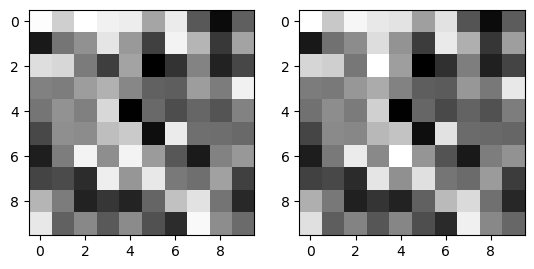

In [14]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(im_noise, cmap='gray');
ax[1].imshow(im_noise2, cmap='gray');

## Importing images

Most of the time we do not generate images but rather import them from some source. There are multiple libraries able to open images in Python. Some are generalist and handle standard formats such as PNG, JPG etc.

### imageio

[imageio](https://imageio.readthedocs.io/en/stable/index.html) is a library capable of reading and writing a very extensive list of image [formats](https://imageio.readthedocs.io/en/stable/formats/index.html). It is straightforward to use:

In [15]:
import imageio.v3 as iio

In [16]:
im_cats = iio.imread('data/woody_bulle.JPG')

We can now ask what are the dimension, or the shape of the image:

In [17]:
im_cats.shape

(2448, 3264, 3)

We see that the list of numbers has three dimensions, in this case, three 2D images of 2448 by 3264 pixels, each image corresponding to one channel, red, green or blue. Matplotlib knows that most natural images have three channel and represents thus such data in the expected way:

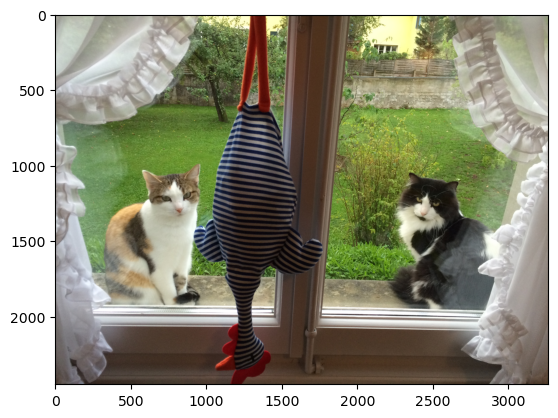

In [18]:
plt.imshow(im_cats);

We can re-use here what we have seen above. For example we can extract a crop from the image using row and columns values, **as well as a value for the plane**. For example we try to crop the black cat in the red channel using:

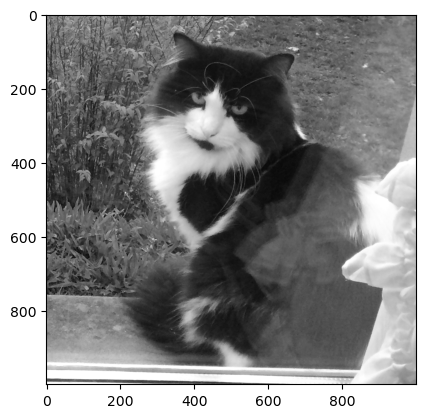

In [19]:
cat_crop = im_cats[1000:2000, 2000:3000, 0]
plt.imshow(cat_crop, cmap='gray');

Instead of a path to a local file, we can also use a web address:

In [20]:
im2 = iio.imread('https://upload.wikimedia.org/wikipedia/commons/1/1f/African_elephant_male.jpg')

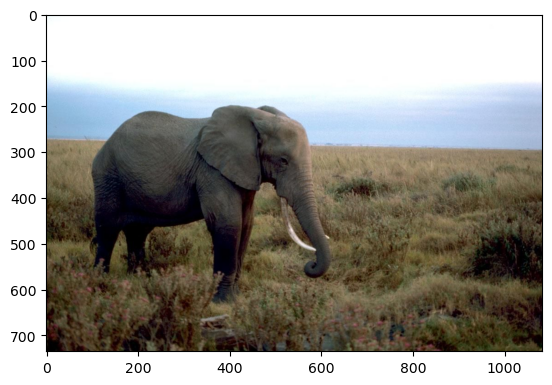

In [21]:
plt.imshow(im2);

Once an image has been created or processed, it can be saved again with imageio. For example we can save the cropped version of the cat image as a png file:

In [22]:
iio.imwrite('data/cat_crop.png', cat_crop)

Once we have imported an image, we often need to do some basic image processing. We present here two options: scikit-image a popular package in sciences with a very straightforward interface, and Pillow, a package centered on natural images (RGB) which is the format used in PyTorch.

## Operate on images

Before we use a specific library to apply operations like filtering to image, let's see how we can already modify an image by operating on pixels. For example we can take the square of the pixel values:

In [23]:
cat_crop_square = cat_crop.astype(float)** 2

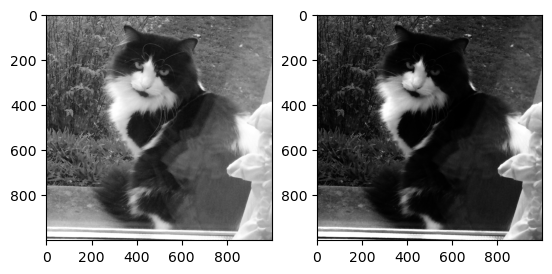

In [24]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(cat_crop, cmap='gray')
ax[1].imshow(cat_crop_square, cmap='gray');

We see that the result is an image with more contrast. You can imagine an complex mathematical operation and apply it to your image. For example we can compute the cosine of an image:

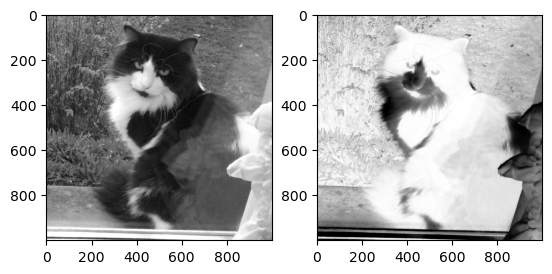

In [25]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(cat_crop, cmap='gray')
ax[1].imshow(np.cos(cat_crop/255), cmap='gray');

Then we can modify parts of the image as we have seen above by selecting a certain group of pixels. For example we can set a square region to black:

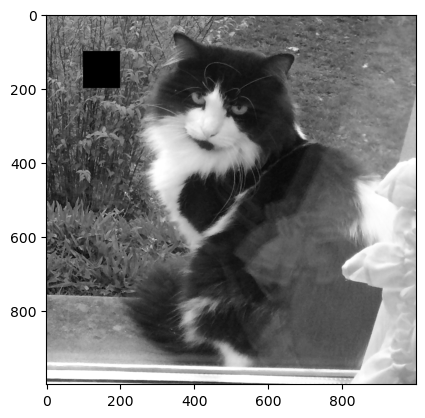

In [26]:
cat_crop2 = cat_crop.copy()
cat_crop2[100:200, 100:200] = 0
plt.imshow(cat_crop2, cmap='gray');

Finally we can combined images, as long as they have the same size. For example we can take two crops and add them together:

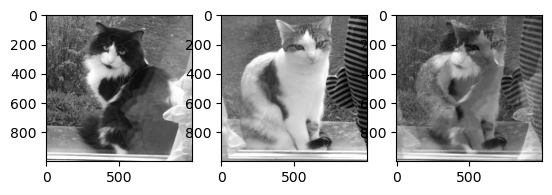

In [27]:
cat1_crop = im_cats[1000:2000, 2000:3000, 0]
cat2_crop = im_cats[1000:2000, 200:1200, 0]

two_cats = cat1_crop.astype(float) + cat2_crop.astype(float)

fig, ax = plt.subplots(1,3)
ax[0].imshow(cat1_crop, cmap='gray')
ax[1].imshow(cat2_crop, cmap='gray');
ax[2].imshow(two_cats, cmap='gray');

## scikit-image

scikit-image is a beginner friendly image processing toolbox. It implements a very wide choice of image processing algorithms and is very user friendly with a simple and consistent functional approach mostly following the pattern ```processed_image = f(image, option1, option2)```. We show here only a few essential tools that might be useful for pre- and post-processing.

### Importing images

Images of various formats can simply be imported with the ```skimage.io``` module as N-dimensional Numpy arrays. scikit-image doesn't implement its own readers, but typically relies on imageio and other more specialized readers.

In [28]:
import skimage

In [29]:
image = skimage.io.imread('data/woody_bulle.JPG')

In [30]:
image.shape

(2448, 3264, 3)

### Adjusting size, orientation

The ```skimage.transform``` submodule contains a large choice of functions to modify the image shape, size, orientation etc. All functions typically take an array as input with a series of options (e.g. rotation angle):

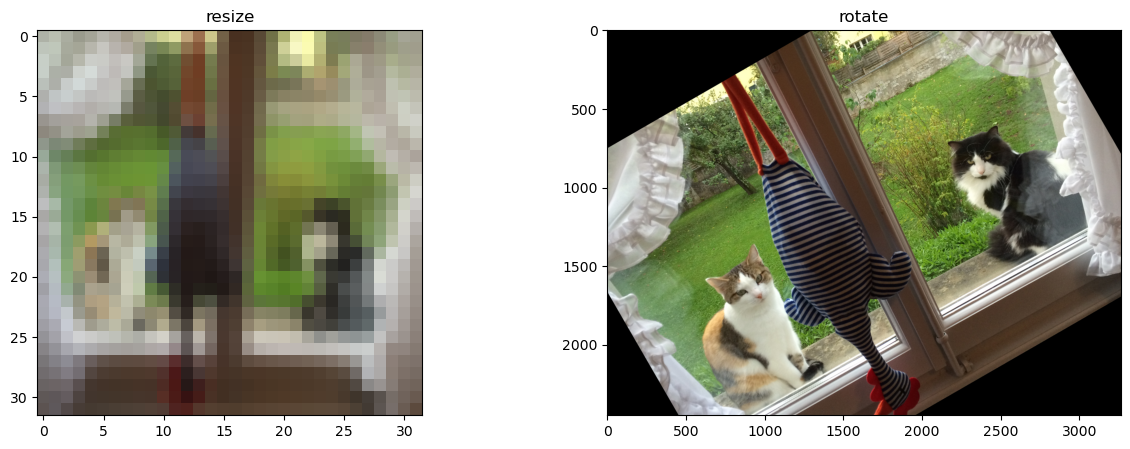

In [31]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].imshow(skimage.transform.resize(image, (32,32)))
ax[0].set_title('resize')
ax[1].imshow(skimage.transform.rotate(image,30))
ax[1].set_title('rotate');

### Adjust colors

scikit-image also has several function to adjust the image colors in the ```color``` module. For example one can turn a color image to gray scale:

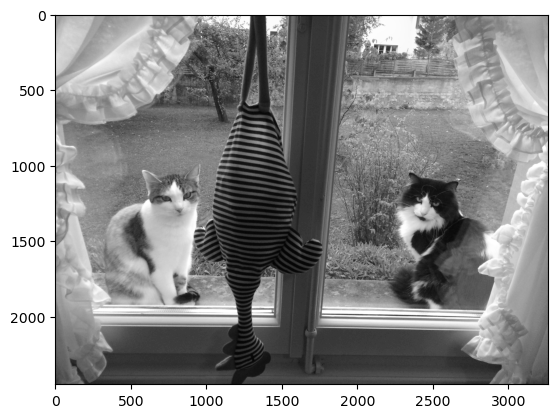

In [32]:
plt.imshow(skimage.color.rgb2gray(image), cmap='gray');

And many other functions are available from the ```exposure``` module. For example gamma correction:

In [33]:
image_gamma = skimage.exposure.adjust_gamma(image, 0.5)

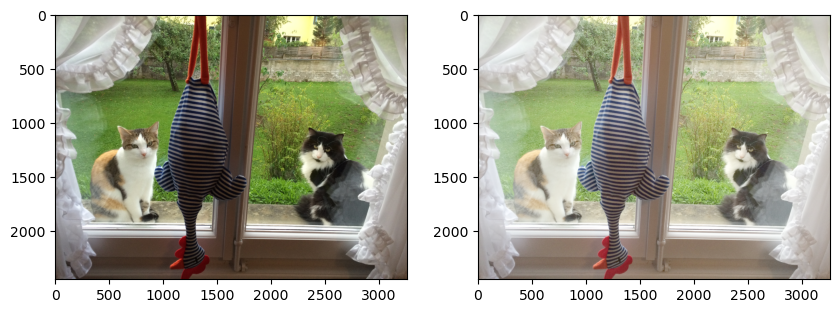

In [34]:
fig, ax = plt.subplots(1,2, figsize=(10,19))
ax[0].imshow(image)
ax[1].imshow(image_gamma);

### Filtering

Filtering is a core operation in digital image processing. As shown in the video below, the idea of filtering consists in applying a mathematical operation **locally** (on a patch of pixels) across the image in order to construct a new image. For a large class of filters called linear, the operation is called a convolution and consists in sliding a tiny image, the filter, across an image, to multiply the filter with the local patch where it is located and to average the result across all pixels. For a 2x2 pixels filter composed of ones as used below, this ends-up being a local average, but filters can have any size and structure, allowing them to highlight various structures.

In [35]:
from IPython.display import HTML

HTML("""
<video width="640" height="480" controls>
  <source src="data/filtering.webm" type="video/webm">
  Filtering video.
</video>
""")

Let's look at some examples. The first one is the Gaussian filter depicted here:

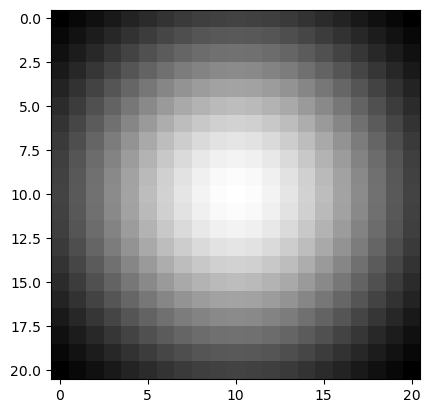

In [36]:
gauss_filter = skimage.io.imread('data/gaussian_filter.png')
plt.imshow(gauss_filter, cmap='gray');

We see that the Guassian filter *is* an actual image, in this a 2D Gaussian (bellshape). When this image travels across an image, it also averages pixels locally, giving more importance to the middle pixel and it's surroundings. This typically generates a smoothing effect. Now we could just apply this filter in a generic way via a convolution (note that we need to make sure the type of the image allows us to do this operation):

In [37]:
from scipy.ndimage import convolve

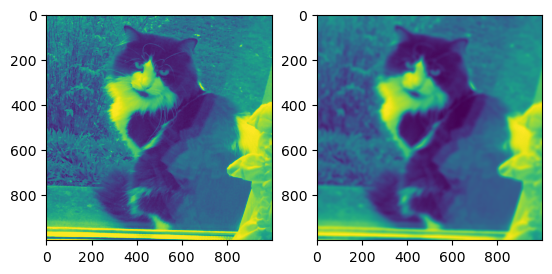

In [38]:
cat_convolved = convolve(cat_crop.astype(np.int64), gauss_filter.astype(np.int64))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cat_crop)
ax[1].imshow(cat_convolved);

Standard filters are also available as "read-to-use" functions int  scikit-image, where one can set additional parameters like the width of the filter. Most of these functions take an image as input and return another modified image. This makes it easier to just play around with parameters e.g. here we can test various widths:

In [39]:
cat_gauss1 = skimage.filters.gaussian(cat_crop, sigma=7)
cat_gauss2 = skimage.filters.gaussian(cat_crop, sigma=20)

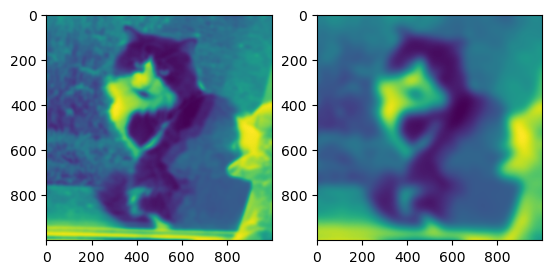

In [40]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cat_gauss1)
ax[1].imshow(cat_gauss2);

Other filters are specifically designed to highlight certain features in an image. For example the Farid filter will find edges in an image:

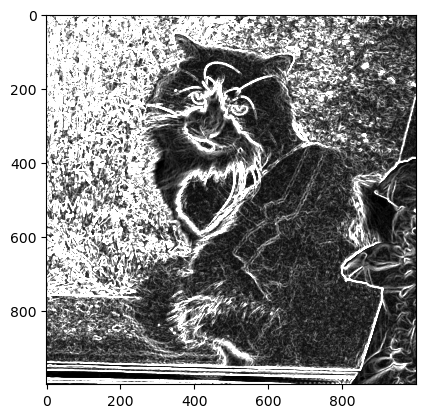

In [41]:
plt.imshow(skimage.filters.farid(cat_crop), cmap='gray', vmin=0, vmax=0.02);

scikit-image offers many other functions used in image analysis, less relevant in the frame of image generation. Feel free to explore more via the great documentation of the library or courses like [this one](https://github.com/guiwitz/DSL_CV1_numpy_skimage).

### Saving images

Just like for import, we can use the ```io``` submodule to save images. Here again, scikit-image relies on other libraries such as imageio. Note that when modifying images it's always important to check that the correct type is used when saving:

In [42]:
skimage.io.imsave('output/cat_gauss2.jpg', (255*cat_gauss2).astype(np.uint8))

## Exercise

- Try to load an image with a standard image format (png, tif, jpg) from your computer and plot it using Matplotlib (copy code from this notebook or ask chatGPT)
- Do the same with an image from the web that you import directly
- Filter your images, or the cat_crop image with the ```hessian``` filter from the scikit-image library and display it.
- Crop a chosen region of your image and display it